# Pyber Ride Sharing Analysis

This analysis utilizes two fictional ride sharing data sets. One contains the driver count and type of 120 different cities. The second set contains the city, date, fare, and ID of every ride in the company's history. The objective of this analysis is to explore the relationship between city type and average fare, number of ride, and number of drivers per city.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

### Inspect the data

In [6]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#120 rows, city - string, driver_count - int, type - string
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
#descriptive statistics for driver count
city_data.describe()

,driver_count
count,120.000000
mean,24.775000
std,20.277678
min,1.000000
25%,7.000000
50%,20.500000
75%,38.250000
max,73.000000


In [8]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [9]:
#2375 rows, city - string, date - string, fare - float, ride id - int
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [14]:
#descriptive statistics for fare
ride_data['fare'].describe()

count    2375.000000
mean       26.753112
std        12.109465
min         4.050000
25%        17.190000
50%        26.600000
75%        36.645000
max        58.550000
Name: fare, dtype: float64

In [15]:
# Combine the data into a single dataset
#left merge on city to return a df that has 2375 rows and 6 columns
ride_share = pd.merge(ride_data, city_data, how = 'left', on = 'city')

# Display the data table for preview
ride_share

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

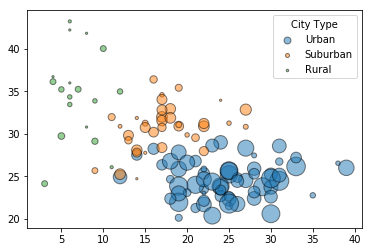

In [86]:
# Obtain the x and y coordinates for each of the three city types

# x-axis:Total Rides per city
# y-axis:Avg Fare per city
# legend:city type
# marker size: driver count per city
tot_rides = pd.DataFrame(ride_share.groupby(by = 'city')['ride_id'].count()).sort_index()

avg_fare = pd.DataFrame(ride_share.groupby(by = 'city')['fare'].mean()).sort_index()

city_types = pd.DataFrame(city_data.set_index('city')['type']).sort_index()

driver_count = pd.DataFrame(city_data.set_index('city')['driver_count']).sort_index()

# urban_rides = tot_rides[city_types['type'] == 'Urban']
# rural_rides = tot_rides[city_types['type'] == 'Rural']
# urban_fare = avg_fare[city_types['type'] == 'Urban']
# rural_fare = avg_fare[city_types['type'] == 'Rural']
# # Build the scatter plots for each city types
# plt.scatter([urban_rides,rural_rides], [urban_fare,rural_fare],s = driver_count*2, alpha = 0.5)
fig, ax = plt.subplots()
for type in list(set(city_data['type'])):
    x, y = tot_rides[city_types['type'] == type],avg_fare[city_types['type'] == type]
    scale = driver_count[city_types['type'] == type]
    ax.scatter(x, y, s = scale*5, label = type, alpha = 0.5, edgecolors = 'black')

# plt.legend(list(set(city_types['type'], )))
# Incorporate the other graph properties

# Create a legend
ax.legend(loc = 0, markerscale = .5, title = 'City Type')
# Incorporate a text label regarding circle size

# Save Figure


In [48]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


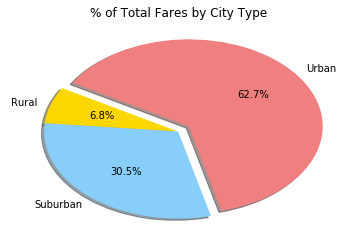

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


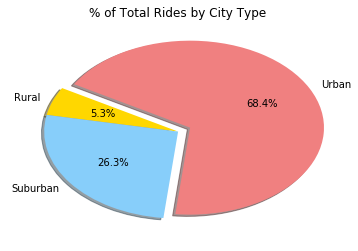

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


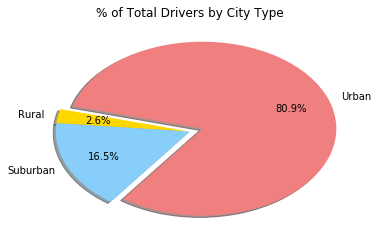

In [6]:
# Show Figure
plt.show()